In [48]:
import os
import numpy as np
import pandas as pd
import plotly as py
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import contextily as ctx
import matplotlib.image as mpimg
import matplotlib
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs 
from plotly.offline import init_notebook_mode
from plotly.offline import plot,iplot
init_notebook_mode(connected=True)
import seaborn as sns
import geos
import mpl_toolkits
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc
import plotly.graph_objs as go

In [2]:
timesData=pd.read_csv('Uni_rankings/timesData.csv')

In [3]:
timesData.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [4]:
timesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
world_rank                2603 non-null object
university_name           2603 non-null object
country                   2603 non-null object
teaching                  2603 non-null float64
international             2603 non-null object
research                  2603 non-null float64
citations                 2603 non-null float64
income                    2603 non-null object
total_score               2603 non-null object
num_students              2544 non-null object
student_staff_ratio       2544 non-null float64
international_students    2536 non-null object
female_male_ratio         2370 non-null object
year                      2603 non-null int64
dtypes: float64(4), int64(1), object(9)
memory usage: 284.8+ KB


In [15]:
data_india=timesData.loc[timesData['country'].isin(['India'])]
data_india

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
510,301-350,Indian Institute of Technology Bombay,India,43.8,14.3,15.7,38.8,24.2,-,"8,327",14.9,1%,16 : 84,2012
832,226-250,Indian Institute of Technology Kharagpur,India,44.2,16.1,45.3,39.0,72.4,-,"9,928",17.5,0%,15 : 85,2013
856,251-275,Indian Institute of Technology Bombay,India,47.3,19.9,33.1,45.6,52.7,-,"8,327",14.9,1%,16 : 84,2013
959,351-400,Indian Institute of Technology Roorkee,India,30.4,15.6,13.7,45.8,70.4,-,"8,061",18.7,1%,17 : 83,2013
1232,226-250,Panjab University,India,25.8,29.3,14.0,84.7,28.4,-,"16,691",23.9,1%,46 : 54,2014
1360,351-400,Indian Institute of Technology Delhi,India,33.8,15.3,23.0,38.5,-,-,"8,371",17.3,1%,18 : 82,2014
1361,351-400,Indian Institute of Technology Kanpur,India,31.3,17.3,25.2,41.8,42.4,-,"6,167",12.2,0%,13 : 87,2014
1362,351-400,Indian Institute of Technology Kharagpur,India,39.3,14.7,30.0,35.3,-,-,"9,928",17.5,0%,15 : 85,2014
1363,351-400,Indian Institute of Technology Roorkee,India,25.1,15.6,12.3,53.6,64.8,-,"8,061",18.7,1%,17 : 83,2014
1679,276-300,Indian Institute of Science,India,32.6,18.2,39.5,51.6,37.9,-,"3,318",8.2,1%,19 : 81,2015


In [16]:
data_india['university_name']=data_india['university_name'].drop_duplicates()

/Users/rinbaruah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
data_india=data_india.dropna(axis=0)

In [18]:
data_india.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 510 to 2547
Data columns (total 14 columns):
world_rank                15 non-null object
university_name           15 non-null object
country                   15 non-null object
teaching                  15 non-null float64
international             15 non-null object
research                  15 non-null float64
citations                 15 non-null float64
income                    15 non-null object
total_score               15 non-null object
num_students              15 non-null object
student_staff_ratio       15 non-null float64
international_students    15 non-null object
female_male_ratio         15 non-null object
year                      15 non-null int64
dtypes: float64(4), int64(1), object(9)
memory usage: 1.8+ KB


In [19]:
data_india=data_india.reset_index(drop=True)
data_india

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,301-350,Indian Institute of Technology Bombay,India,43.8,14.3,15.7,38.8,24.2,-,"8,327",14.9,1%,16 : 84,2012
1,226-250,Indian Institute of Technology Kharagpur,India,44.2,16.1,45.3,39.0,72.4,-,"9,928",17.5,0%,15 : 85,2013
2,351-400,Indian Institute of Technology Roorkee,India,30.4,15.6,13.7,45.8,70.4,-,"8,061",18.7,1%,17 : 83,2013
3,226-250,Panjab University,India,25.8,29.3,14.0,84.7,28.4,-,"16,691",23.9,1%,46 : 54,2014
4,351-400,Indian Institute of Technology Delhi,India,33.8,15.3,23.0,38.5,-,-,"8,371",17.3,1%,18 : 82,2014
5,351-400,Indian Institute of Technology Kanpur,India,31.3,17.3,25.2,41.8,42.4,-,"6,167",12.2,0%,13 : 87,2014
6,276-300,Indian Institute of Science,India,32.6,18.2,39.5,51.6,37.9,-,"3,318",8.2,1%,19 : 81,2015
7,401-500,Indian Institute of Technology Madras,India,34.6,16.1,20.7,31.4,88.9,-,"8,234",15.9,1%,19 : 81,2016
8,501-600,Indian Institute of Technology Guwahati,India,24.3,12.9,20.7,42.6,32.3,-,"4,710",14.2,1%,14 : 86,2016
9,501-600,Jadavpur University,India,32.8,7.7,22.2,31.8,33.8,-,"10,697",16.1,0%,30 : 70,2016


In [20]:
data_india.index=data_india.index+1
data_india

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1,301-350,Indian Institute of Technology Bombay,India,43.8,14.3,15.7,38.8,24.2,-,"8,327",14.9,1%,16 : 84,2012
2,226-250,Indian Institute of Technology Kharagpur,India,44.2,16.1,45.3,39.0,72.4,-,"9,928",17.5,0%,15 : 85,2013
3,351-400,Indian Institute of Technology Roorkee,India,30.4,15.6,13.7,45.8,70.4,-,"8,061",18.7,1%,17 : 83,2013
4,226-250,Panjab University,India,25.8,29.3,14.0,84.7,28.4,-,"16,691",23.9,1%,46 : 54,2014
5,351-400,Indian Institute of Technology Delhi,India,33.8,15.3,23.0,38.5,-,-,"8,371",17.3,1%,18 : 82,2014
6,351-400,Indian Institute of Technology Kanpur,India,31.3,17.3,25.2,41.8,42.4,-,"6,167",12.2,0%,13 : 87,2014
7,276-300,Indian Institute of Science,India,32.6,18.2,39.5,51.6,37.9,-,"3,318",8.2,1%,19 : 81,2015
8,401-500,Indian Institute of Technology Madras,India,34.6,16.1,20.7,31.4,88.9,-,"8,234",15.9,1%,19 : 81,2016
9,501-600,Indian Institute of Technology Guwahati,India,24.3,12.9,20.7,42.6,32.3,-,"4,710",14.2,1%,14 : 86,2016
10,501-600,Jadavpur University,India,32.8,7.7,22.2,31.8,33.8,-,"10,697",16.1,0%,30 : 70,2016


In [31]:
data_india['world_rank'].sort_values()

2     226-250
4     226-250
7     276-300
1     301-350
3     351-400
5     351-400
6     351-400
8     401-500
9     501-600
10    501-600
11    601-800
12    601-800
13    601-800
14    601-800
15    601-800
Name: world_rank, dtype: object

In [34]:
data_india=data_india.sort_values(by=['world_rank'])

In [35]:
data_india=data_india.reset_index(drop=True)
data_india.index=data_india.index+1
data_india

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1,226-250,Indian Institute of Technology Kharagpur,India,44.2,16.1,45.3,39.0,72.4,-,"9,928",17.5,0%,15 : 85,2013
2,226-250,Panjab University,India,25.8,29.3,14.0,84.7,28.4,-,"16,691",23.9,1%,46 : 54,2014
3,276-300,Indian Institute of Science,India,32.6,18.2,39.5,51.6,37.9,-,"3,318",8.2,1%,19 : 81,2015
4,301-350,Indian Institute of Technology Bombay,India,43.8,14.3,15.7,38.8,24.2,-,"8,327",14.9,1%,16 : 84,2012
5,351-400,Indian Institute of Technology Roorkee,India,30.4,15.6,13.7,45.8,70.4,-,"8,061",18.7,1%,17 : 83,2013
6,351-400,Indian Institute of Technology Delhi,India,33.8,15.3,23.0,38.5,-,-,"8,371",17.3,1%,18 : 82,2014
7,351-400,Indian Institute of Technology Kanpur,India,31.3,17.3,25.2,41.8,42.4,-,"6,167",12.2,0%,13 : 87,2014
8,401-500,Indian Institute of Technology Madras,India,34.6,16.1,20.7,31.4,88.9,-,"8,234",15.9,1%,19 : 81,2016
9,501-600,Indian Institute of Technology Guwahati,India,24.3,12.9,20.7,42.6,32.3,-,"4,710",14.2,1%,14 : 86,2016
10,501-600,Jadavpur University,India,32.8,7.7,22.2,31.8,33.8,-,"10,697",16.1,0%,30 : 70,2016


Above are all the Indian colleges featuring in the top 1000 time university rankings

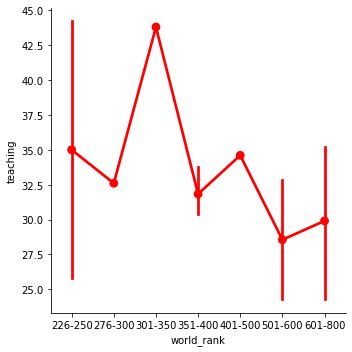

In [51]:
sns.factorplot(x='world_rank',y='teaching',data=data_india,color='red')

Hence, for the Indian colleges, it seems that the lower ranked colleges have scored lower on teaching. However, colleges ranked between 300-400 have scored the most.

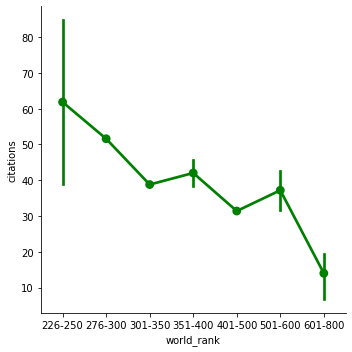

In [52]:
sns.factorplot(x='world_rank',y='citations',data=data_india,color='green')

The higher ranked colleges seem to have far higher citations. Hence, citations do play a major role in the rankings.

Let us now concetrate our study on the world's top 100 universities.

In [78]:
df=timesData.iloc[:100,:]
trace1=go.Scatter(x=df.world_rank,y=df.citations,
                  mode='lines',name='citations',marker=dict(color='green'),text=df.university_name)
trace2=go.Scatter(x=df.world_rank,y=df.teaching, marker=dict(color='red'),mode='lines+markers',text=df.university_name,name='teaching')
data=[trace1,trace2]

layout=dict(title='Citation and Teaching vs World Rank (top100)',
           xaxis=dict(title='World Rank'),yaxis=dict(title='Score',ticklen=5))

data=[trace1,trace2]
fig=dict(data=data,layout=layout)


iplot(fig)

For the top 100 universities, Teaching scores play a more important role when compared to citations. There isn't a strong correlation amongst the citations and rankings. This trend is opposite to what was seen in the Indian colleges.

In [80]:
df2014=timesData.loc[timesData['year'].isin(['2014'])]
df2014=df2014.iloc[:100,:]
df2014

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1002,1,California Institute of Technology,United States of America,94.4,65.8,98.2,99.8,91.2,94.9,"2,243",6.9,27%,33 : 67,2014
1003,2,Harvard University,United States of America,95.3,66.2,98.5,99.1,40.6,93.9,"20,152",8.9,25%,NaN,2014
1004,2,University of Oxford,United Kingdom,89.0,90.2,98.5,95.4,90.3,93.9,"19,919",11.6,34%,46 : 54,2014
1005,4,Stanford University,United States of America,94.7,68.0,96.8,99.1,61.3,93.8,"15,596",7.8,22%,42 : 58,2014
1006,5,Massachusetts Institute of Technology,United States of America,92.9,82.0,89.0,100.0,94.3,93.0,"11,074",9.0,33%,37 : 63,2014
1007,6,Princeton University,United States of America,89.9,59.6,97.6,99.7,80.5,92.7,"7,929",8.4,27%,45 : 55,2014
1008,7,University of Cambridge,United Kingdom,90.6,86.7,95.3,95.7,52.8,92.3,"18,812",11.8,34%,46 : 54,2014
1009,8,"University of California, Berkeley",United States of America,83.2,57.3,97.5,99.3,59.5,89.8,"36,186",16.4,15%,50 : 50,2014
1010,9,University of Chicago,United States of America,85.6,58.6,88.2,98.0,-,87.8,"14,221",6.9,21%,42 : 58,2014
1011,10,Imperial College London,United Kingdom,84.5,91.8,88.1,90.0,72.3,87.5,"15,060",11.7,51%,37 : 63,2014


In [81]:
df2015=timesData.loc[timesData['year'].isin(['2015'])]
df2015=df2015.iloc[:100,:]
df2016=timesData.loc[timesData['year'].isin(['2016'])]
df2016=df2016.iloc[:100,:]



In [88]:
trace1=go.Scatter(x=df2014.world_rank,y=df2014.citations,
                  mode='markers+lines',name='2014',
                  text=df2014.university_name)
trace2=go.Scatter(x=df2015.world_rank,y=df2015.citations,
                  mode='markers+lines',name='2015',
                  text=df2015.university_name)
trace3=go.Scatter(x=df2016.world_rank,y=df2016.citations,
                  mode='markers+lines',name='2016',
                  text=df2016.university_name)
data=[trace1,trace2,trace3]
layout=dict(title='Citation Vs World Ranking (top100)',
           xaxis=('World Rank'),yaxis=('Citation'))
iplot(data,layout)

As it can be seen, for all 3 years of data, the citations do not have any clear trend to the world ranking

In [89]:
df=timesData.iloc[:100,:]
trace1=go.Scatter(x=df.world_rank,y=df.income,
                  mode='lines',name='income',marker=dict(color='green'),text=df.university_name)
trace2=go.Scatter(x=df.world_rank,y=df.teaching, marker=dict(color='red'),mode='lines+markers',text=df.university_name,name='teaching')
data=[trace1,trace2]

layout=dict(title='Income and Teaching vs World Rank (top100)',
           xaxis=dict(title='World Rank'),yaxis=dict(title='Score',ticklen=5))

data=[trace1,trace2]
fig=dict(data=data,layout=layout)


iplot(fig)

Income doesn't seem to show much correlation either

In [90]:
df=timesData.iloc[:100,:]
trace1=go.Scatter(x=df.world_rank,y=df.research,
                  mode='lines',name='research',marker=dict(color='green'),text=df.university_name)
trace2=go.Scatter(x=df.world_rank,y=df.teaching, marker=dict(color='red'),mode='lines+markers',text=df.university_name,name='teaching')
data=[trace1,trace2]

layout=dict(title='Income and Teaching vs World Rank (top100)',
           xaxis=dict(title='World Rank'),yaxis=dict(title='Score',ticklen=5))

data=[trace1,trace2]
fig=dict(data=data,layout=layout)


iplot(fig)

However, upon plotting for level of research, a clear trend is seen. Higher ranked universities score better on teaching and research front.

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

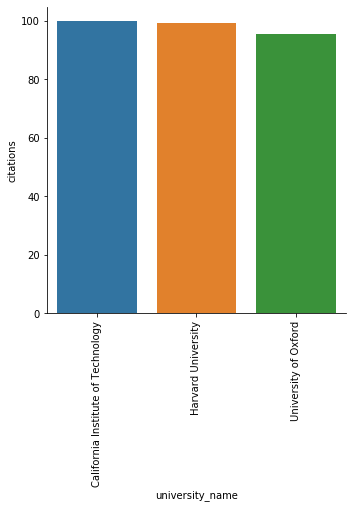

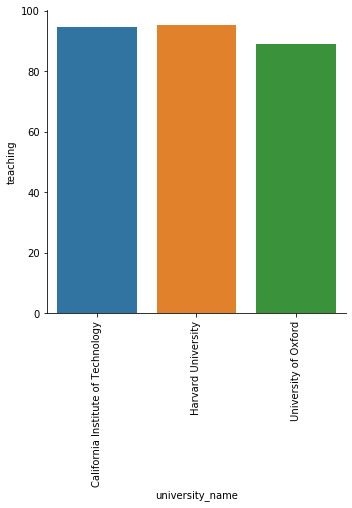

In [100]:
df=df2014.iloc[:3,:]
sns.factorplot(x='university_name',y='citations',data=df,kind='bar')
plt.xticks(rotation=90)
sns.factorplot(x='university_name',y='teaching',data=df,kind='bar')
plt.xticks(rotation=90)

In order to visualise the above in a single bar plot, we code the following

In [108]:
trace1=go.Bar(x=df.university_name,
             y=df.citations,
             name='citations',
             text=df.university_name)
trace2=go.Bar(x=df.university_name,
             y=df.teaching,
             name='teaching',
             text=df.university_name)
data=[trace1,trace2]
layout=go.Layout(barmode='group')
fig=go.Figure(data=data,layout=layout)
iplot(fig)

In [109]:
trace1=go.Bar(x=df.university_name,
             y=df.citations,
             name='citations',
             text=df.university_name)
trace2=go.Bar(x=df.university_name,
             y=df.teaching,
             name='teaching',
             text=df.university_name)
data=[trace1,trace2]
layout=go.Layout(barmode='relative')
fig=go.Figure(data=data,layout=layout)
iplot(fig)

([<matplotlib.axis.XTick at 0x1a34a51210>,
 <a list of 10 Text xticklabel objects>)

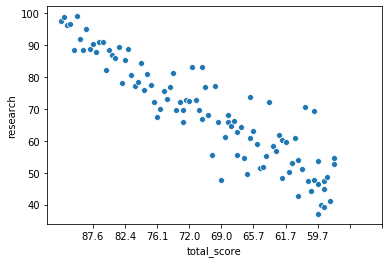

In [144]:
sns.scatterplot('total_score','research',data=df2016)

plt.xticks(np.arange(10,110,10))


As we can see, the correlation between research and total scores are high